In [208]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
df = pd.read_excel("/content/drive/MyDrive/CIS607_datasets/week 3/HDR21-22_Statistical_Annex_GII_Table.xlsx", na_values=['..'])
df

,Country,Gender Inequality Index Value,Maternal mortality ratio,Adolescent birth rate,Share of seats in parliament,Female Population with at least some secondary education,Male Population with at least some secondary education,Female Labour force participation rate,Male Labour force participation rate
0,Switzerland,0.018,5.0,2.212,39.837398,96.858673,97.533417,61.728,72.705
1,Norway,0.016,2.0,2.336,44.970414,99.094223,99.283562,60.294,71.950
2,Iceland,0.043,4.0,5.395,47.619048,99.768417,99.662552,61.671,70.463
3,"Hong Kong, China (SAR)",NaN,NaN,1.584,NaN,77.100433,83.368141,53.524,65.771
4,Australia,0.073,6.0,8.096,37.885463,94.580063,94.430069,61.057,70.547
...,...,...,...,...,...,...,...,...,...
190,South Sudan,0.587,1150.0,99.199,32.334385,26.537640,36.357239,70.440,73.574
191,Korea (Democratic People's Rep. of),NaN,89.0,2.325,17.612809,NaN,NaN,77.185,86.141
192,Monaco,NaN,NaN,7.162,33.333333,NaN,NaN,NaN,NaN
193,Nauru,NaN,NaN,72.479,10.526316,NaN,NaN,NaN,NaN


In [211]:
#Lets drop null values as they will be invalid for our study
df1 = df.dropna()

In [212]:
#Lets rename column names
df1.columns = ['Country','GII_value','Maternal_mortality', "Adoslescent_birth", "Parliament_seats", "F_population_w_Sec_Edu","M_population_w_Sec_Edu", "F_Labor_participation", "M_Labor_participation"]
df1

,Country,GII_value,Maternal_mortality,Adoslescent_birth,Parliament_seats,F_population_w_Sec_Edu,M_population_w_Sec_Edu,F_Labor_participation,M_Labor_participation
0,Switzerland,0.018,5.0,2.212,39.837398,96.858673,97.533417,61.728,72.705
1,Norway,0.016,2.0,2.336,44.970414,99.094223,99.283562,60.294,71.950
2,Iceland,0.043,4.0,5.395,47.619048,99.768417,99.662552,61.671,70.463
4,Australia,0.073,6.0,8.096,37.885463,94.580063,94.430069,61.057,70.547
5,Denmark,0.013,4.0,1.908,39.664804,95.067261,95.238098,57.721,66.653
...,...,...,...,...,...,...,...,...,...
186,Burundi,0.505,548.0,53.621,38.888889,7.799910,13.046886,78.991,77.379
187,Central African Republic,0.672,829.0,160.507,12.857143,13.940000,31.560000,63.312,79.486
188,Niger,0.611,509.0,170.462,25.903614,9.163242,15.232771,61.730,84.267
189,Chad,0.652,1140.0,138.306,32.258065,7.739064,24.369996,46.914,69.927


In [213]:
df1.dtypes

Country                    object
GII_value                 float64
Maternal_mortality        float64
Adoslescent_birth         float64
Parliament_seats          float64
F_population_w_Sec_Edu    float64
M_population_w_Sec_Edu    float64
F_Labor_participation     float64
M_Labor_participation     float64
dtype: object

In [214]:
df1.corr().round(2)

<ipython-input-214-72877cdc9da9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr().round(2)


,GII_value,Maternal_mortality,Adoslescent_birth,Parliament_seats,F_population_w_Sec_Edu,M_population_w_Sec_Edu,F_Labor_participation,M_Labor_participation
GII_value,1.00,0.71,0.81,-0.42,-0.81,-0.78,-0.07,0.16
Maternal_mortality,0.71,1.00,0.75,-0.16,-0.70,-0.64,0.23,0.11
Adoslescent_birth,0.81,0.75,1.00,-0.09,-0.73,-0.69,0.26,0.26
Parliament_seats,-0.42,-0.16,-0.09,1.00,0.17,0.17,0.28,0.06
F_population_w_Sec_Edu,-0.81,-0.70,-0.73,0.17,1.00,0.97,-0.10,-0.27
M_population_w_Sec_Edu,-0.78,-0.64,-0.69,0.17,0.97,1.00,-0.08,-0.28
F_Labor_participation,-0.07,0.23,0.26,0.28,-0.10,-0.08,1.00,0.43
M_Labor_participation,0.16,0.11,0.26,0.06,-0.27,-0.28,0.43,1.00


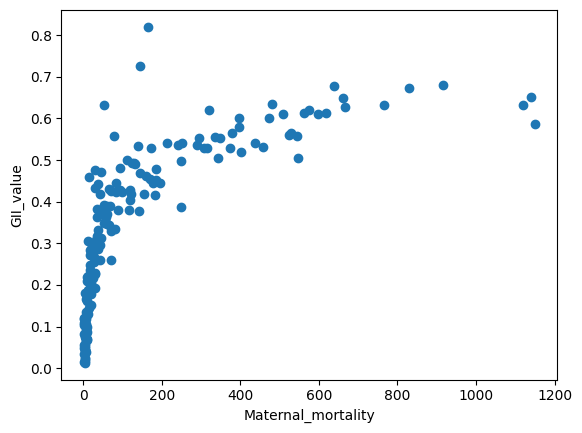

In [215]:
#Plot days_since_start Vs average_delay_minutes
plt.scatter(df1["Maternal_mortality"], df1["GII_value"])
plt.xlabel("Maternal_mortality")
plt.ylabel('GII_value')

plt.show()

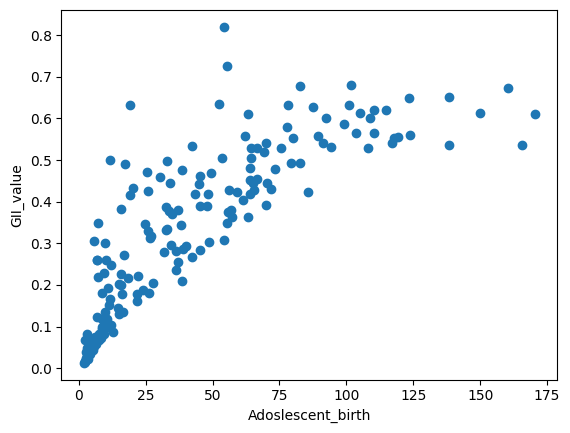

In [216]:
#Plot days_since_start Vs average_delay_minutes
plt.scatter(df1["Adoslescent_birth"], df1["GII_value"])
plt.xlabel("Adoslescent_birth")
plt.ylabel('GII_value')

plt.show()

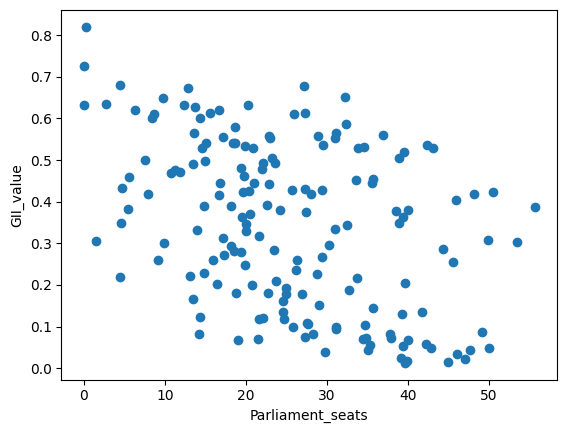

In [217]:
#Plot days_since_start Vs average_delay_minutes
plt.scatter(df1["Parliament_seats"], df1["GII_value"])
plt.xlabel("Parliament_seats")
plt.ylabel('GII_value')

plt.show()

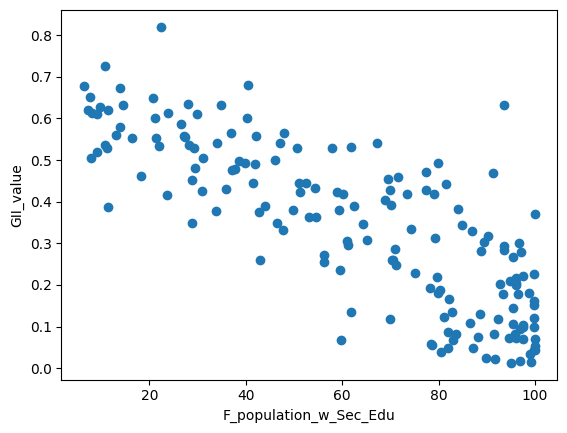

In [218]:
#Plot days_since_start Vs average_delay_minutes
plt.scatter(df1["F_population_w_Sec_Edu"], df1["GII_value"])
plt.xlabel("F_population_w_Sec_Edu")
plt.ylabel('GII_value')

plt.show()

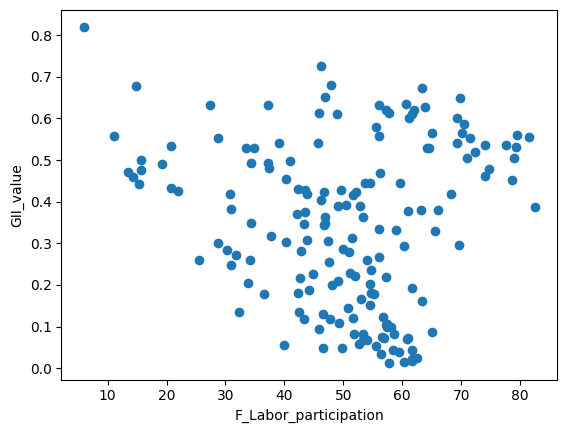

In [219]:
#Plot days_since_start Vs average_delay_minutes
plt.scatter(df1["F_Labor_participation"], df1["GII_value"])
plt.xlabel("F_Labor_participation")
plt.ylabel('GII_value')

plt.show()

In [220]:
#Lets set up dependent and independent variables

X = pd.DataFrame(df1.iloc[:,[2,3,4,5,7]]) #iloc selects values using row number and column number
#For x, we have selected all the records from all the rows but columns number 2,3,4,5 &7


y = pd.DataFrame(df1.iloc[:,1])
#Similarly, for y or indendent variable, we are only selecting all rows & column number 1
 #(which is GII_value)

In [221]:
#Lets look at our x
X

,Maternal_mortality,Adoslescent_birth,Parliament_seats,F_population_w_Sec_Edu,F_Labor_participation
0,5.0,2.212,39.837398,96.858673,61.728
1,2.0,2.336,44.970414,99.094223,60.294
2,4.0,5.395,47.619048,99.768417,61.671
4,6.0,8.096,37.885463,94.580063,61.057
5,4.0,1.908,39.664804,95.067261,57.721
...,...,...,...,...,...
186,548.0,53.621,38.888889,7.799910,78.991
187,829.0,160.507,12.857143,13.940000,63.312
188,509.0,170.462,25.903614,9.163242,61.730
189,1140.0,138.306,32.258065,7.739064,46.914


In [222]:
#Lets look at our y
y

,GII_value
0,0.018
1,0.016
2,0.043
4,0.073
5,0.013
...,...
186,0.505
187,0.672
188,0.611
189,0.652


In [223]:
#Next step is to divide the data into training data and testing data. I will use 80% training data and 20% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [224]:
#Lets look at the shape of our training and testing datsets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(136, 5)
(34, 5)
(136, 1)
(34, 1)


In [225]:
#Training our algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [226]:
#Lets look at the cofficients the model has selected
v = pd.DataFrame(regressor.coef_, index = ["Cofficient"]).transpose()#column for cofficients
w = pd.DataFrame(X.columns, columns = ["Attribute"]) #column for the names of variables
coffi = pd.concat([w,v], axis = 1, join ="inner") #Lets concatenate next to eachother
coffi

,Attribute,Cofficient
0,Maternal_mortality,0.000031
1,Adoslescent_birth,0.002625
2,Parliament_seats,-0.004190
3,F_population_w_Sec_Edu,-0.002531
4,F_Labor_participation,-0.002373


In [227]:
#Lets find the intercept of our regression equation
regressor.intercept_

array([0.60770281])

In [228]:
#Lets use stats model to get a summary of our Regression Model
import statsmodels.api as sm

#add constant to predictor variables
X_train = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, X_train).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              GII_value   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     197.6
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           6.07e-59
Time:                        06:35:12   Log-Likelihood:                 170.51
No. Observations:                 136   AIC:                            -329.0
Df Residuals:                     130   BIC:                            -311.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [229]:
#Lets predict the values in our test data
y_pred = regressor.predict(X_test)
y_pred

array([[0.38302477],
       [0.31300163],
       [0.66247358],
       [0.534368  ],
       [0.53375625],
       [0.40735696],
       [0.22614239],
       [0.15475971],
       [0.34737749],
       [0.08838779],
       [0.13981288],
       [0.29014972],
       [0.25978956],
       [0.23699179],
       [0.40118799],
       [0.45678906],
       [0.44222541],
       [0.03155378],
       [0.19723373],
       [0.19162985],
       [0.22723475],
       [0.28487812],
       [0.25927429],
       [0.2953065 ],
       [0.44071858],
       [0.42482806],
       [0.4221629 ],
       [0.37584941],
       [0.29990579],
       [0.20177838],
       [0.58693221],
       [0.71686106],
       [0.60781871],
       [0.21753091]])

In [230]:
#Lets find accuracy of our model using r2 score
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_pred)*100
print("Accuracy of model is %.2f" %accuracy)

Accuracy of model is 83.55


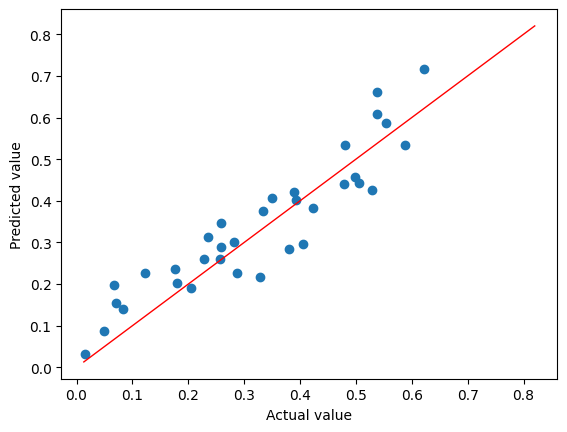

In [231]:
#Lets plot the predicted value and actual values of test dataset
plt.scatter(y_test, y_pred)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

#What should it look like if all test values predicted actual y-values (in red)
X_ref = Y_ref = np.linspace(y.min(), y.max(), 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

In [232]:
#Lets create a dataframe for predicted y_values and actual y_values for our test data

pred_df = pd.DataFrame({'Actual_Value':y_test.squeeze(), 'Predicted_Value': y_pred.squeeze()})
#the squeeze method is used to reduce the dimension of arrarys
pred_df

,Actual_Value,Predicted_Value
125,0.424,0.383025
58,0.235,0.313002
184,0.537,0.662474
134,0.481,0.534368
190,0.587,0.533756
127,0.349,0.407357
28,0.123,0.226142
23,0.071,0.154760
97,0.259,0.347377
25,0.049,0.088388
